#**Algoritmo Genetico - OneMax**
En el algoritmo genético clásico (AGC) propuesto por John Henry Holland, cada individuo o posible solución es representado por una cadena de bits de longitud fija. Se asume que cada posición en la cadena representa una característica específica del individuo y el valor almacenado en dicha posición, representa la forma en que se manifiesta dicha característica en la solución.

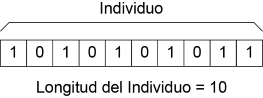

Fuente de gráfico: https://neo.lcc.uma.es/parknet/desktop/enlacesAlgoritmosgeneticos.html#Contenido

###**Función para generar una población inicial aleatoria**
Un AG está compuesto por una colección de individuos llamada población. El número de individuos que integra dicha población se denomina “tamaño de la población”. El primer paso en el AG canónico, consiste en inicializar dicha población de forma aleatoria con una distribución uniforme.

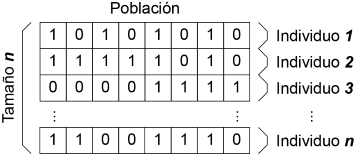

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
def generar_poblacion_inicial(tamano, longitud_individuo):
    poblacion = []
    for _ in range(tamano):
        individuo = [random.randint(0, 1) for _ in range(longitud_individuo)]
        poblacion.append(individuo)
    return poblacion



```
generar_poblacion_inicial(5,2)
[[1, 1], [0, 0], [1, 1], [1, 1], [0, 0]]
```



###**Función para evaluar la aptitud de un individuo**
El AG determina la calidad de un individuo utilizando la “función de fitness” y esta varia dependiendo del problema que se este resolviendo. Para el caso de del problema OneMax la función de fitness calcula la suma total de unos dentro de la cadena de bits

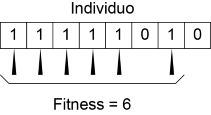

In [ ]:
def evaluar_aptitud(individuo):
    return sum(individuo)

### Función para seleccionar individuos para la reproducción
Para poder realizar la operación de cruza, el AG debe seleccionar ciertos individuos de la población. Dichos individuos generalmente son seleccionados con una probabilidad que es proporcional al valor de fitness de los individuos en cuestión, así entonces, los individuos con mejor valor de fitness tienen una mayor probabilidad de ser seleccionados que los de menor valor de fitness, a dicho método se le conoce con el nombre de “método de la ruleta”.

Otro método de selección clásico en los AG es el “torneo binario”. En este, el AG selecciona aleatoriamente y con la misma probabilidad dos individuos de la población, posteriormente se calcula el valor de fitness de cada uno de los individuos seleccionados. El individuo con mejor valor de fitness será el individuo finalmente seleccionado.

In [ ]:
def seleccionar(poblacion, tamano_torneo):
    torneo = random.sample(poblacion, tamano_torneo)
    return max(torneo, key=evaluar_aptitud)

### Función para cruzar dos individuos
La operación de cruce (también llamada recombinación) tiene como objetivo intercambiar información entre dos padres de tal forma que con el paso del tiempo se vallan heredando las mejores características de cada uno de los padres dando como resultado en muchos de los casos descendientes con mejores valores de fitness que los padres.

Quizá el método de cruza mas utilizado en los AG clásicos sea el denominado “cruza de un punto”. En este, dados dos individuos (padres) seleccionados previamente (por el método de la ruleta, torneo binario, etc) y un punto de cruza generado aleatoriamente, se intercambian las partes de los individuos para generar a los descendientes

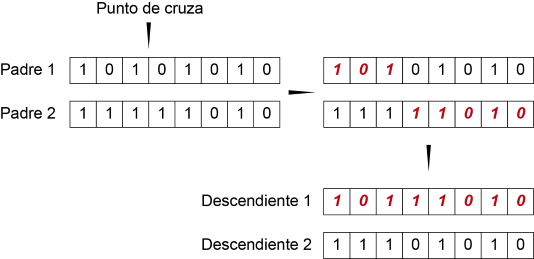

In [ ]:
def cruzar(individuo1, individuo2):
    punto_cruza = random.randint(1, len(individuo1) - 1)
    descendiente1 = individuo1[:punto_cruza] + individuo2[punto_cruza:]
    descendiente2 = individuo2[:punto_cruza] + individuo1[punto_cruza:]
    return descendiente1, descendiente2

###Función para mutar un individuo
La operación de mutación, tiene como objetivo ayudar a que el AG no se quede atrapado en óptimos locales. El método clásico de mutación empleado por los AG, es el denominado “bit flip” que tiene como objeto volver ‘0’ los ‘1’ y viceversa para aquellas posiciones del individuo que hayan sido seleccionadas con base en la probabilidad de mutación.

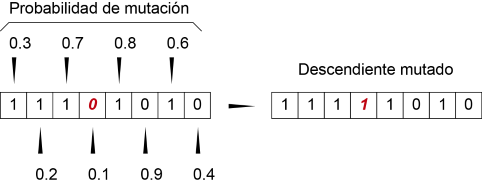

In [ ]:
def mutar(individuo, probabilidad_mutacion):
    for i in range(len(individuo)):
        if random.random() < probabilidad_mutacion:
            individuo[i] = 1 - individuo[i]
    return individuo

### Función para reemplazar la población anterior con la nueva generación
Una vez que los individuos han sido cruzados y mutados, se crea una nueva población que será utilizada durante la siguiente iteración del proceso evolutivo, es decir, se seleccionan aquellos individuos que son mas aptos para seguir adelante y se desechan (mueren) aquellos individuos menos aptos.

In [ ]:
def reemplazar(poblacion, nueva_poblacion):
    poblacion.extend(nueva_poblacion)
    poblacion.sort(key=evaluar_aptitud, reverse=True)
    return poblacion[:len(poblacion) // 2]

### Parámetros del algoritmo genético

In [ ]:
tamano_poblacion = 50
longitud_individuo = 80
tamano_torneo = 10
probabilidad_cruza = 0.8
probabilidad_mutacion = 0.01
num_generaciones = 50


In [ ]:
aptitud_promedio_generaciones = []

### Generar una población inicial aleatoria

In [ ]:
poblacion = generar_poblacion_inicial(tamano_poblacion, longitud_individuo)

### Parámetros del algoritmo genético

In [ ]:
for generacion in range(num_generaciones):
    # Seleccionar dos individuos para la reproducción y cruzarlos
    nueva_poblacion = []
    for _ in range(tamano_poblacion // 2):
        individuo1 = seleccionar(poblacion, tamano_torneo)
        individuo2 = seleccionar(poblacion, tamano_torneo)
        descendiente1, descendiente2 = cruzar(individuo1, individuo2)
        nueva_poblacion.append(descendiente1)
        nueva_poblacion.append(descendiente2)

    # Mutar algunos de los nuevos individuos
    for i in range(len(nueva_poblacion)):
        nueva_poblacion[i] = mutar(nueva_poblacion[i], probabilidad_mutacion)

    # Reemplazar la población anterior con la nueva generación
    poblacion = reemplazar(poblacion, nueva_poblacion)

    # Calcular y rastrear la aptitud promedio de la población actual
    aptitudes = [evaluar_aptitud(individuo) for individuo in poblacion]
    aptitud_promedio = sum(aptitudes) / tamano_poblacion
    aptitud_promedio_generaciones.append(aptitud_promedio)


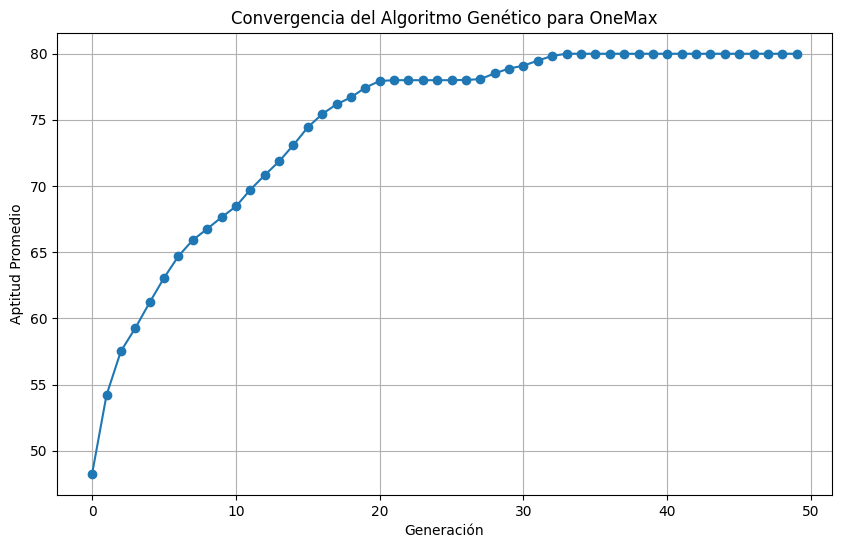

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_generaciones), aptitud_promedio_generaciones, marker='o', linestyle='-')
plt.title('Convergencia del Algoritmo Genético para OneMax')
plt.xlabel('Generación')
plt.ylabel('Aptitud Promedio')
plt.grid(True)
plt.show()

### Imprimir el mejor individuo encontrado

In [ ]:
mejor_individuo = max(poblacion, key=evaluar_aptitud)
print("Mejor individuo:", mejor_individuo)
print("Aptitud/Fitness:", evaluar_aptitud(mejor_individuo))

Mejor individuo: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Aptitud/Fitness: 80
